In [34]:
import pandas as pd
from scipy.stats import chi2_contingency

# Caricare il dataset
df = pd.read_csv('rounded_updated_films.csv')

def get_first_value(x):
    if pd.notnull(x):  # Controlla se il valore non è NaN
        return x.split(',')[0].strip()
    return x

# Estrai il primo valore di 'country' e 'language'
df['first_country'] = df['country'].apply(get_first_value)
df['first_language'] = df['language'].apply(get_first_value)

# Crea una tabella di contingenza
contingency_table = pd.crosstab(df['first_country'], df['first_language'])

# Esegui il test chi-quadro
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Stampa i risultati
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies:")
print(expected)

contingency_table.to_csv('contingency_table.csv', index=False)


Chi2: 818082.2843871017
P-value: 0.0
Degrees of Freedom: 13209
Expected frequencies:
[[2.41627604e-04 9.18184893e-04 4.83255207e-05 ... 4.83255207e-05
  2.89953124e-04 1.44976562e-04]
 [4.83255207e-04 1.83636979e-03 9.66510414e-05 ... 9.66510414e-05
  5.79906248e-04 2.89953124e-04]
 [4.83255207e-04 1.83636979e-03 9.66510414e-05 ... 9.66510414e-05
  5.79906248e-04 2.89953124e-04]
 ...
 [1.23230078e-02 4.68274296e-02 2.46460156e-03 ... 2.46460156e-03
  1.47876093e-02 7.39380467e-03]
 [2.41627604e-04 9.18184893e-04 4.83255207e-05 ... 4.83255207e-05
  2.89953124e-04 1.44976562e-04]
 [6.04069009e-03 2.29546223e-02 1.20813802e-03 ... 1.20813802e-03
  7.24882811e-03 3.62441405e-03]]


PermissionError: [Errno 13] Permission denied: 'contingency_table.csv'

In [7]:

# Verifica se ci sono frequenze attese inferiori a 5
low_expected_frequencies = expected[expected < 5]

if low_expected_frequencies.size == 0:
    print("Tutte le frequenze attese sono superiori a 5. Le frequenze attese sono adeguate.")
else:
    print("Attenzione: Alcune frequenze attese sono inferiori a 5.")
    print("Le frequenze attese inferiori a 5 sono le seguenti:")
    print(low_expected_frequencies)

Attenzione: Alcune frequenze attese sono inferiori a 5.
Le frequenze attese inferiori a 5 sono le seguenti:
[2.41627604e-04 9.18184893e-04 4.83255207e-05 ... 1.20813802e-03
 7.24882811e-03 3.62441405e-03]


In [10]:
# Specifica una soglia per le frequenze basse
threshold = 5

# Trova i valori nella tabella di contingenza che sono inferiori alla soglia
low_frequencies = contingency_table[contingency_table < threshold]

# Stampa i valori con frequenze basse
print("Valori con frequenze basse:")
print(low_frequencies)


Valori con frequenze basse:
first_language  Aboriginal  Afrikaans  Akan  Albanian  American Sign Language  \
first_country                                                                   
Afghanistan              0        0.0     0         0                       0   
Albania                  0        0.0     0         2                       0   
Algeria                  0        0.0     0         0                       0   
Andorra                  0        0.0     0         0                       0   
Argentina                0        0.0     0         0                       0   
...                    ...        ...   ...       ...                     ...   
Venezuela                0        0.0     0         0                       0   
Vietnam                  0        0.0     0         0                       0   
West Germany             0        0.0     0         0                       0   
Yemen                    0        0.0     0         0                       0   


In [32]:
import pandas as pd
from scipy.stats import chi2_contingency

# Caricare il dataset
df = pd.read_csv('rounded_updated_films.csv')

# Funzione per espandere le colonne 'country' e 'language'
def expand_columns(df, col1, col2):
    # Riempire i valori NaN con stringhe vuote per evitare errori durante la divisione
    df[col1] = df[col1].fillna('')
    df[col2] = df[col2].fillna('')
    
    # Split and explode the columns
    df_expanded = df.copy()
    df_expanded[col1] = df_expanded[col1].str.split(', ')
    df_expanded[col2] = df_expanded[col2].str.split(', ')
    df_expanded = df_expanded.explode(col1).explode(col2)
    
    # Rimuovere righe con valori vuoti dopo l'esplosione
    df_expanded = df_expanded[(df_expanded[col1] != '') & (df_expanded[col2] != '')]
    return df_expanded

# Espandere le colonne 'country' e 'language'
df_expanded = expand_columns(df, 'country', 'language')

# Creare una tabella di contingenza
contingency_table = pd.crosstab(df_expanded['country'], df_expanded['language'])

# Eseguire il test chi-quadro
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Visualizzare i risultati
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Salvare la tabella di contingenza per eventuali verifiche future
#contingency_table.to_csv('contingency_table.csv')


Chi2: 590624.9949839278
P-value: 0.0
Degrees of Freedom: 31710
Expected frequencies:
[[1.83210103e-03 8.54980479e-03 3.05350171e-04 ... 2.38173134e-02
  1.52675086e-03 1.03819058e-02]
 [1.17777923e-03 5.49630308e-03 1.96296539e-04 ... 1.53111300e-02
  9.81482693e-04 6.67408231e-03]
 [2.48642282e-03 1.16033065e-02 4.14403804e-04 ... 3.23234967e-02
  2.07201902e-03 1.40897293e-02]
 ...
 [6.15062488e-03 2.87029161e-02 1.02510415e-03 ... 7.99581234e-02
  5.12552073e-03 3.48535410e-02]
 [5.23457436e-04 2.44280137e-03 8.72429061e-05 ... 6.80494667e-03
  4.36214530e-04 2.96625881e-03]
 [1.30864359e-04 6.10700342e-04 2.18107265e-05 ... 1.70123667e-03
  1.09053633e-04 7.41564702e-04]]


In [23]:
import pandas as pd
from scipy.stats import chi2_contingency

# Rimuovere le righe con valori NaN nelle colonne 'country' e 'language'
df_expanded.dropna(subset=['country', 'language'], inplace=True)

# Riduzione delle categorie
df_expanded['country'] = df_expanded['country'].apply(lambda x: x if df_expanded['country'].value_counts()[x] > 10 else 'Altro')
df_expanded['language'] = df_expanded['language'].apply(lambda x: x if df_expanded['language'].value_counts()[x] > 10 else 'Altro')

# Calcolo della tabella di contingenza
contingency_table = pd.crosstab(df_expanded['country'], df_expanded['language'])

# Esecuzione del test chi-quadro
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi2: 431742.3952163828
P-value: 0.0
Degrees of Freedom: 9384
Expected frequencies:
[[0.0085498  0.02564941 0.01496216 ... 0.01190866 0.02381731 0.01038191]
 [0.01160331 0.03480992 0.02030579 ... 0.01616175 0.0323235  0.01408973]
 [0.14473598 0.43420794 0.25328797 ... 0.20159655 0.40319309 0.17575083]
 ...
 [0.01343541 0.04030622 0.02351196 ... 0.0187136  0.03742721 0.01631442]
 [0.10565116 0.31695348 0.18488953 ... 0.14715697 0.29431394 0.12829069]
 [0.02870292 0.08610875 0.0502301  ... 0.03997906 0.07995812 0.03485354]]


In [21]:
import pandas as pd
from scipy.stats import chi2_contingency

# Caricare il dataset
df = pd.read_csv('rounded_updated_films.csv')

# Funzione per ottenere il primo valore di ogni cella
def get_first_value(x):
    if pd.notnull(x):
        return x.split(',')[0].strip()
    return x

# Funzione per esplodere colonne con valori multipli
def expand_columns(df, col1, col2):
    # Riempire i valori NaN con stringhe vuote per evitare errori durante la divisione
    df[col1] = df[col1].fillna('')
    df[col2] = df[col2].fillna('')
    
    # Split and explode the columns
    df_expanded = df.copy()
    df_expanded[col1] = df_expanded[col1].str.split(', ')
    df_expanded[col2] = df_expanded[col2].str.split(', ')
    df_expanded = df_expanded.explode(col1).explode(col2)
    
    # Rimuovere righe con valori vuoti dopo l'esplosione
    df_expanded = df_expanded[(df_expanded[col1] != '') & (df_expanded[col2] != '')]
    return df_expanded

# Situazione 1: Usare solo il primo valore
df_first_value = df.copy()
df_first_value['country'] = df_first_value['country'].apply(get_first_value)
df_first_value['language'] = df_first_value['language'].apply(get_first_value)

# Creare una tabella di contingenza
contingency_table_first = pd.crosstab(df_first_value['country'], df_first_value['language'])

# Calcolare il numero di categorie uniche
num_countries_first = df_first_value['country'].nunique()
num_languages_first = df_first_value['language'].nunique()

# Situazione 2: Usare tutti i valori
df_expanded = expand_columns(df, 'country', 'language')

# Creare una tabella di contingenza
contingency_table_expanded = pd.crosstab(df_expanded['country'], df_expanded['language'])

# Calcolare il numero di categorie uniche
num_countries_expanded = df_expanded['country'].nunique()
num_languages_expanded = df_expanded['language'].nunique()

# Visualizzare i risultati
print("Usando solo il primo valore:")
print(f"Numero di paesi unici: {num_countries_first}")
print(f"Numero di lingue uniche: {num_languages_first}")
print(f"Gradi di libertà: {(num_countries_first - 1) * (num_languages_first - 1)}")

print("\nUsando tutti i valori:")
print(f"Numero di paesi unici: {num_countries_expanded}")
print(f"Numero di lingue uniche: {num_languages_expanded}")
print(f"Gradi di libertà: {(num_countries_expanded - 1) * (num_languages_expanded - 1)}")


Usando solo il primo valore:
Numero di paesi unici: 120
Numero di lingue uniche: 112
Gradi di libertà: 13209

Usando tutti i valori:
Numero di paesi unici: 152
Numero di lingue uniche: 211
Gradi di libertà: 31710


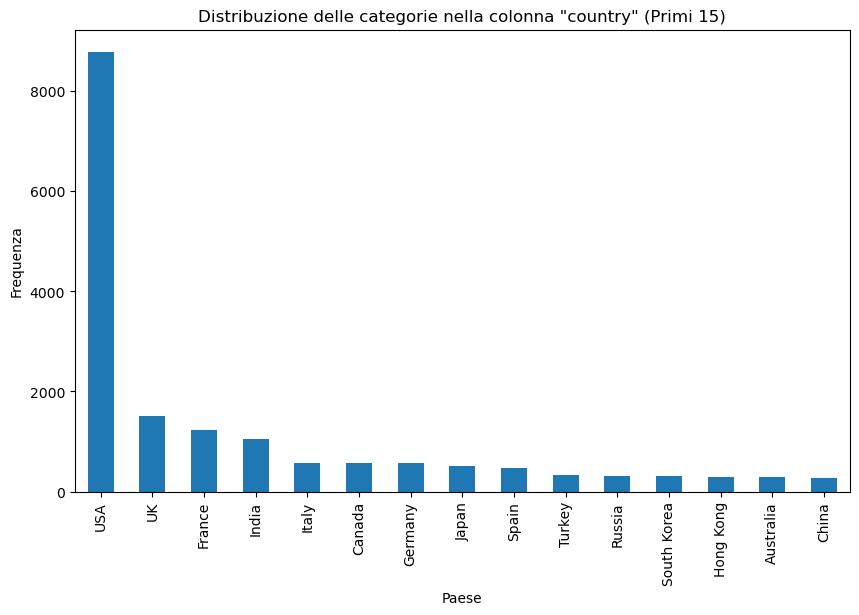

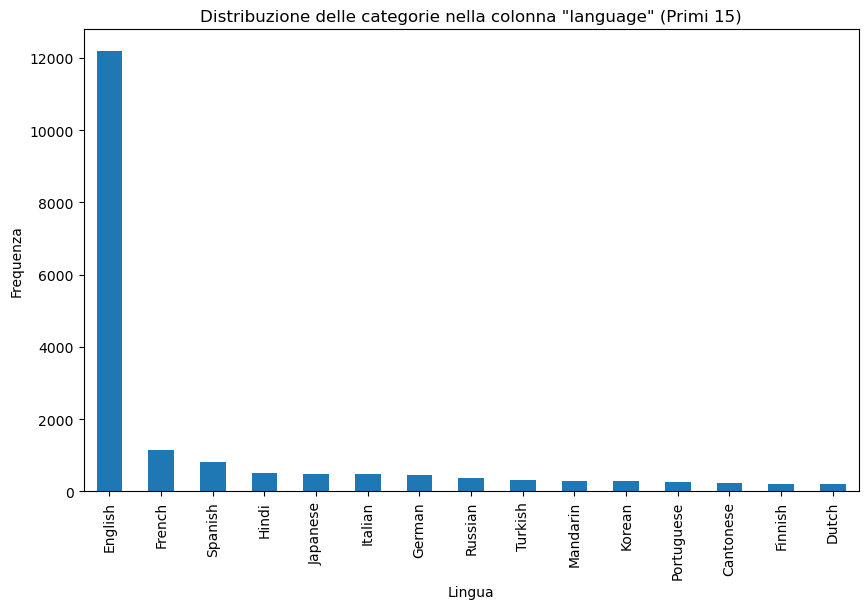

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('rounded_updated_films.csv')
# Funzione per mantenere solo il primo valore in ogni cella
def mantieni_primo_valore(df, colonna):
    df[colonna] = df[colonna].str.split(',').str[0]
    return df

# Applica la funzione alle colonne 'country' e 'language'
df_expanded = mantieni_primo_valore(df, 'country')
df_expanded = mantieni_primo_valore(df, 'language')


top_country_values = df_expanded['country'].value_counts().head(15)
top_language_values = df_expanded['language'].value_counts().head(15)

# Grafico a barre per la distribuzione delle categorie nella colonna 'country'
plt.figure(figsize=(10, 6))
top_country_values.plot(kind='bar')
plt.title('Distribuzione delle categorie nella colonna "country" (Primi 15)')
plt.xlabel('Paese')
plt.ylabel('Frequenza')
plt.show()

# Grafico a barre per la distribuzione delle categorie nella colonna 'language'
plt.figure(figsize=(10, 6))
top_language_values.plot(kind='bar')
plt.title('Distribuzione delle categorie nella colonna "language" (Primi 15)')
plt.xlabel('Lingua')
plt.ylabel('Frequenza')
plt.show()

# Funzione per raggruppare il resto sotto 'Altro'
def raggruppa_sotto_altro(df, colonna, n=10):
    valori_contati = df[colonna].value_counts()
    categorie_da_mantenere = valori_contati[:n].index
    df[colonna] = df[colonna].apply(lambda x: x if x in categorie_da_mantenere else 'Altro')
    return df

# Applica la funzione alle colonne 'country' e 'language'
df_expanded = raggruppa_sotto_altro(df_expanded, 'country', n=15)
df_expanded = raggruppa_sotto_altro(df_expanded, 'language', n=15)


In [58]:
#codice per lasciare solo le prime 15 lingue e paesi
import pandas as pd

# Carica il dataset
df = pd.read_csv('rounded_updated_films.csv')

# Trova i 15 valori più popolari in 'country' e 'language'
top_countries = df['country'].str.split(',').explode().value_counts().head(15).index
top_languages = df['language'].str.split(',').explode().value_counts().head(15).index

# Funzione per mantenere i valori tra i primi 15 e aggiungere 'Other' se necessario
def filtra_valori_e_aggiungi_other(valore, top_values):
    if isinstance(valore, str):
        valori = valore.split(',')
        nuovi_valori = [v.strip() for v in valori if v.strip() in top_values]
        if len(nuovi_valori) != len(valori):  # Aggiungi 'Other' se ci sono valori non presenti nei top 15
            nuovi_valori.append('Other')
        return ', '.join(sorted(set(nuovi_valori), key=nuovi_valori.index))  # Mantieni l'ordine originale e rimuovi duplicati
    return valore

# Applica la funzione alle colonne 'country' e 'language'
df['country'] = df['country'].apply(lambda x: filtra_valori_e_aggiungi_other(x, top_countries))
df['language'] = df['language'].apply(lambda x: filtra_valori_e_aggiungi_other(x, top_languages))

# Rimuovi le righe duplicate basandoti sul valore di 'imdb_title_id'
df = df.drop_duplicates(subset='imdb_title_id')

# Salva il dataset risultante in un nuovo file CSV
df.to_csv('reduced_country_language.csv', index=False)

# Visualizza le prime righe del dataset risultante
print(df.head())

df.to_csv('reduced_country_language.csv', index=False) #dataset con 15 country e language

   Unnamed: 0 imdb_title_id                      title  \
0           0     tt0003471           Traffic in Souls   
1           1     tt0005060                     Carmen   
2           2     tt0005149                 The Coward   
3           3     tt0006509  The Children in the House   
4           4     tt0006886                      Judex   

              original_title  year date_published                genre  \
0           Traffic in Souls  1913     1913-11-24         Crime, Drama   
1                     Carmen  1915     1915-10-31                Drama   
2                 The Coward  1915     1915-11-14  Drama, History, War   
3  The Children in the House  1916     1916-04-30                Drama   
4                      Judex  1916     1917-01-19     Adventure, Crime   

   duration country language  ... usa_gross_income worlwide_gross_income  \
0        88     USA  English  ...              NaN             1800000.0   
1        59     USA  English  ...              NaN    

In [9]:
#duration fix
import pandas as pd

# Carica i due dataset
df1 = pd.read_csv('rounded_updated_films_PC.csv')
df2 = pd.read_csv('../dataset/final_imdb_data_with_updated_budgets.csv')

# Effettua il merge sulla colonna 'imdb_title_id' e unisci le colonne 'duration'
df_merged = pd.merge(df1, df2[['imdb_title_id', 'duration']], on='imdb_title_id', suffixes=('_df1', '_df2'))

# Mantieni solo la nuova durata nel primo dataset e dividi tutti i valori per 10
df_merged['duration_df1'] = df_merged['duration_df2'] / 10

# Rimuovi la colonna 'duration_df2'
df_merged.drop(columns=['duration_df2'], inplace=True)

# Visualizza il dataset risultante
print(df_merged.head())
df_merged.to_csv('rounded_updated_films_PC.csv',index=False)


   Unnamed: 0 imdb_title_id                      title  \
0           0     tt0003471           Traffic in Souls   
1           1     tt0005060                     Carmen   
2           2     tt0005149                 The Coward   
3           3     tt0006509  The Children in the House   
4           4     tt0006886                      Judex   

              original_title  year date_published                genre  \
0           Traffic in Souls  1913     1913-11-24         Crime, Drama   
1                     Carmen  1915     1915-10-31                Drama   
2                 The Coward  1915     1915-11-14  Drama, History, War   
3  The Children in the House  1916     1916-04-30                Drama   
4                      Judex  1916     1917-01-19     Adventure, Crime   

   duration_df1 country language  ... cast_oscar_won dir_globe_nomination  \
0          88.0     USA  English  ...            0.0                  0.0   
1          59.0     USA  English  ...            0.0

In [5]:
import pandas as pd
from scipy.stats import chi2_contingency

# Caricare il dataset
df = pd.read_csv('../dataset/gg_bft_os_movies.csv')

def get_first_value(x):
    if pd.notnull(x):  # Controlla se il valore non è NaN
        return x.split(',')[0].strip()
    return x

# Estrai il primo valore di 'country' e 'language'
df['country'] = df['country'].apply(get_first_value)
df['language'] = df['language'].apply(get_first_value)

# Crea una tabella di contingenza
contingency_table = pd.crosstab(df['country'], df['language'])

# Esegui il test chi-quadro
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Stampa i risultati
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies:")
print(expected)

df.to_csv('only_one_language_country.csv', index=False)

Chi2: 99040.32002671546
P-value: 0.0
Degrees of Freedom: 90
Expected frequencies:
[[3.82468770e+02 3.69839373e+01 1.64272582e+01 1.70602351e+01
  1.50708791e+01 1.59148483e+01 8.94607383e+01 1.33527989e+01
  2.59821956e+01 1.02783395e+01]
 [9.38061445e+02 9.07085974e+01 4.02902898e+01 4.18427597e+01
  3.69635686e+01 3.90335285e+01 2.19415743e+02 3.27497218e+01
  6.37251923e+01 2.52091538e+01]
 [4.67802893e+02 4.52355702e+01 2.00924089e+01 2.08666118e+01
  1.84334027e+01 1.94656732e+01 1.09420678e+02 1.63319948e+01
  3.17791862e+01 1.25715806e+01]
 [6.51363346e+02 6.29854855e+01 2.79764381e+01 2.90544293e+01
  2.56664570e+01 2.71037786e+01 1.52356089e+02 2.27404809e+01
  4.42489719e+01 1.75045237e+01]
 [3.71418308e+02 3.59153805e+01 1.59526344e+01 1.65673230e+01
  1.46354444e+01 1.54550293e+01 8.68759979e+01 1.29670037e+01
  2.52315061e+01 9.98137307e+00]
 [3.38266921e+02 3.27097102e+01 1.45287629e+01 1.50885868e+01
  1.33291403e+01 1.40755721e+01 7.91217766e+01 1.18096183e+01
  2.29794

In [6]:
import pandas as pd
# Carica i due dataset
df1 = pd.read_csv('rounded_updated_films.csv')
df2 = pd.read_csv('other.csv')

# Effettua il merge sulla colonna 'imdb_title_id' e unisci le colonne 'duration'
df_merged = pd.merge(df1, df2[['imdb_title_id', 'production_company']], on='imdb_title_id', suffixes=('_df1', '_df2'))

df_merged['production_company_df1'] = df_merged['production_company_df2']

# Rimuovi la colonna 'duration_df2'
df_merged.drop(columns=['production_company_df2'], inplace=True)

# Visualizza il dataset risultante
print(df_merged.head())
df_merged.to_csv('rounded_updated_films_PC.csv',index=False)

   Unnamed: 0 imdb_title_id                      title  \
0           0     tt0003471           Traffic in Souls   
1           1     tt0005060                     Carmen   
2           2     tt0005149                 The Coward   
3           3     tt0006509  The Children in the House   
4           4     tt0006886                      Judex   

              original_title  year date_published                genre  \
0           Traffic in Souls  1913     1913-11-24         Crime, Drama   
1                     Carmen  1915     1915-10-31                Drama   
2                 The Coward  1915     1915-11-14  Drama, History, War   
3  The Children in the House  1916     1916-04-30                Drama   
4                      Judex  1916     1917-01-19     Adventure, Crime   

   duration country language  ... usa_gross_income worlwide_gross_income  \
0        88     USA  English  ...              NaN             1800000.0   
1        59     USA  English  ...              NaN    

In [7]:
import pandas as pd

# Carica i dataset
# Assumendo che i dataset siano in formato CSV, si possono leggere con pd.read_csv
# Sostituisci 'first_dataset.csv' e 'second_dataset.csv' con i nomi effettivi dei tuoi file

first_dataset = pd.read_csv('rounded_updated_films_PC.csv')
second_dataset = pd.read_csv('../dataset/gg_bft_os_movies.csv')

# Seleziona solo le colonne necessarie dal secondo dataset
second_dataset_columns = [
    'imdb_title_id',
    'dir_oscar_nomination', 'dir_oscar_won', 'writer_oscar_nomination', 'writer_oscar_won',
    'cast_oscar_nomination', 'cast_oscar_won', 'dir_globe_nomination', 'dir_globe_won',
    'cast_globe_nomination', 'cast_globe_won', 'actors_films_before', 'director_films_before',
    'writers_films_before', 'BAFTA_nominees', 'BAFTA_awards'
]

second_dataset = second_dataset[second_dataset_columns]

# Effettua il merge dei due dataset sul campo 'imdb_title_id'
merged_dataset = pd.merge(first_dataset, second_dataset, on='imdb_title_id', how='left')

# Salva il dataset risultante in un nuovo file CSV
merged_dataset.to_csv('rounded_updated_films_PC.csv', index=False)
